#**Project Name**    - DeepCSAT: E-Commerce Customer Satisfaction Score Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**


This project focuses on predicting Customer Satisfaction (CSAT) scores for the e-commerce platform "Shopzilla" using Deep Learning, specifically Artificial Neural Networks (ANNs). The goal is to create a model that accurately forecasts CSAT scores based on customer interactions, providing actionable insights for improving service quality.

Key Steps:

1.Data Preparation: Cleaned and processed the dataset, including feature engineering and scaling.

2.Model Development: Designed and trained an ANN model, utilizing cross-validation and hyperparameter tuning to optimize performance.

3.Evaluation: Assessed the model using metrics like Mean Squared Error (MSE) and R² score.

4.Insight Generation: Analyzed feature importance and identified patterns impacting CSAT scores.

5.Deployment: Developed a Flask application to deploy the model, enabling real-time CSAT predictions via an API.

6.Outcome: The project successfully demonstrates how deep learning can predict CSAT scores, offering valuable insights to improve customer satisfaction. The model is deployed through Flask, making it accessible for integration into business workflows.

# **GitHub Link -**
https://github.com/merajsultana/DeepCSAT-E-Commerce-Customer-Satisfaction-Score-Prediction

# **Problem Statement**


The primary goal of this project is to develop a deep learning model that can accurately predict the CSAT scores based on customer interactions and feedback. By doing so, we aim to provide e-commerce businesses with a powerful tool to monitor and enhance customer satisfaction in real-time, thereby improving service quality and fostering customer loyalty.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


### Dataset Loading

In [ ]:
# Load Dataset
data = pd.read_csv('/content/eCommerce_Customer_support_data.csv')

### Dataset First View

In [ ]:
# Dataset First Look
data.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape

(85907, 20)

### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
data.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isnull().sum()

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,57165
Order_id,18232
order_date_time,68693
Issue_reported at,0
issue_responded,0
Survey_response_Date,0


<Axes: >

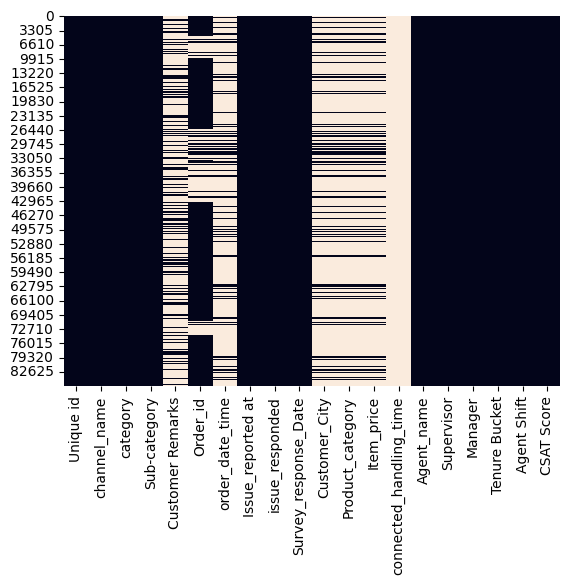

In [ ]:
# Visualizing the missing values
sns.heatmap(data.isnull(), cbar=False)

### What did you know about your dataset?

We have observed that this data set has (85907, 20) rows and columns and there is no duplicates and some columns have missing values, the name of these columns are Customer Remarks,Order_id, order_date_time, customer_city, product_category, item_price, connected_handling_time

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [ ]:
# Dataset Describe
data.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


### Variables Description

Unique id: Unique identifier for each record (integer).

Channel name: Name of the customer service channel (object/string).

Category: Category of the interaction (object/string).

Sub-category: Sub-category of the interaction (object/string).

Customer Remarks: Feedback provided by the customer (object/string).

Order id: Identifier for the order associated with the interaction (integer).

Order date time: Date and time of the order (datetime).

Issue reported at: Timestamp when the issue was reported (datetime).

Issue responded: Timestamp when the issue was responded to (datetime).

Survey response date: Date of the customer survey response (datetime).

Customer city: City of the customer (object/string).

Product category: Category of the product (object/string).

Item price: Price of the item (float).

Connected handling time: Time taken to handle the interaction (float).

Agent name: Name of the customer service agent (object/string).

Supervisor: Name of the supervisor (object/string).

Manager: Name of the manager (object/string).

Tenure Bucket: Bucket categorizing agent tenure (object/string).

Agent Shift: Shift timing of the agent (object/string).

CSAT Score: Customer Satisfaction (CSAT) score (integer).

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
data.nunique()

,0
Unique id,85907
channel_name,3
category,12
Sub-category,57
Customer Remarks,18231
Order_id,67675
order_date_time,13766
Issue_reported at,30923
issue_responded,30262
Survey_response_Date,31


## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

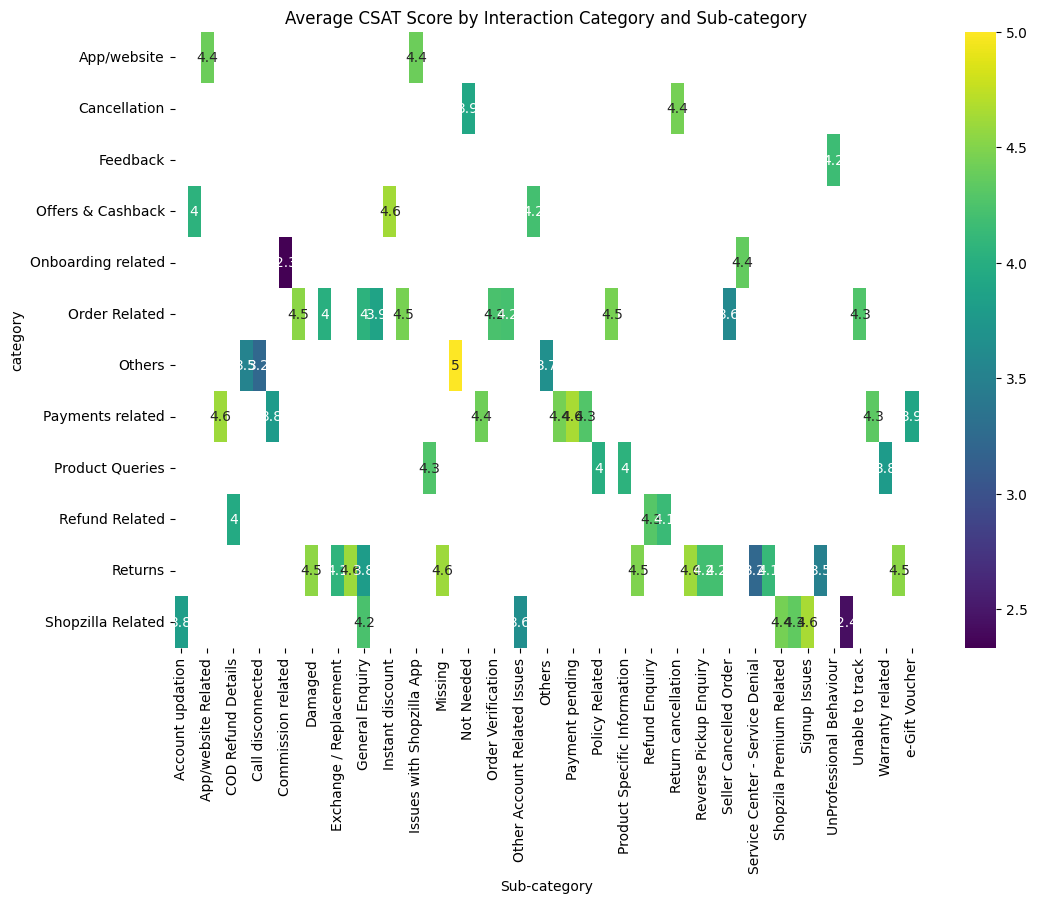

In [ ]:
#  Heatmap
interaction_csats = data.pivot_table(index='category', columns='Sub-category', values='CSAT Score', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(interaction_csats, annot=True, cmap='viridis')
plt.title('Average CSAT Score by Interaction Category and Sub-category')
plt.show()


##### 1. Why did you pick the specific chart?

 This heatmap can highlight which interaction types or categories are more likely to lead to higher or lower customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

This chart presents a detailed view of customer satisfaction (CSAT) scores across different interaction categories and sub-categories. The color-coded representation highlights variations in satisfaction levels, with the highest score of 5.0 found in the "Others" category under "General Enquiry," indicating strong customer approval in that area. Conversely, the lowest CSAT score of 2.2 appears under "Onboarding related" in "Unprofessional Behavior," suggesting significant dissatisfaction with onboarding experiences. Categories such as "Payments related" and "Offers & Cashback" generally perform well, scoring above 4.0, reflecting positive customer interactions. However, "Shopzilla Related" interactions show lower average satisfaction, suggesting areas for improvement.

#### Chart - 2

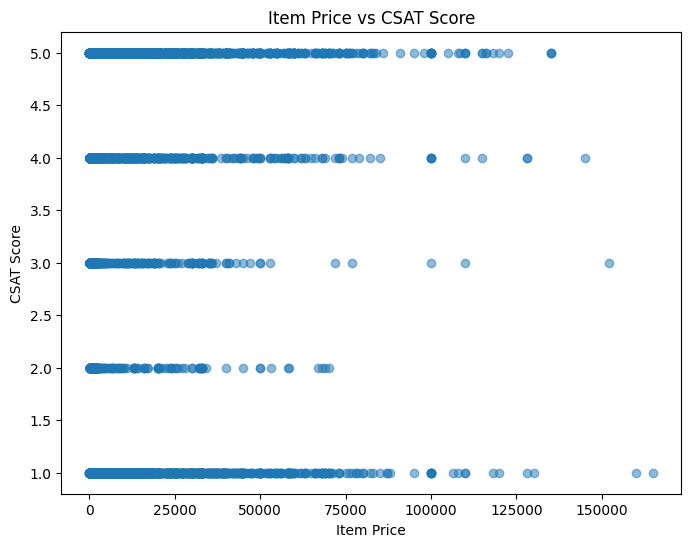

In [ ]:
# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(data['Item_price'], data['CSAT Score'], alpha=0.5)
plt.title('Item Price vs CSAT Score')
plt.xlabel('Item Price')
plt.ylabel('CSAT Score')
plt.show()

##### 1. Why did you pick the specific chart?

Item price may impact customer satisfaction, and this plot helps visualize whether there is any pattern or correlation.
python

##### 2. What is/are the insight(s) found from the chart?

This scatter plot illustrates the relationship between item prices and Customer Satisfaction (CSAT) scores. The distribution of data points suggests that higher CSAT scores (4.0 and 5.0) are consistently observed across a broad range of item prices, indicating that customers tend to rate items positively regardless of price. While lower CSAT scores (1.0 and 2.0) do exist across various price ranges, they appear less frequently, suggesting that dissatisfaction is not strongly correlated with higher prices alone. Notably, even some expensive items receive lower satisfaction ratings, pointing to potential quality or service-related concerns rather than price-based dissatisfaction.

#### Chart - 3

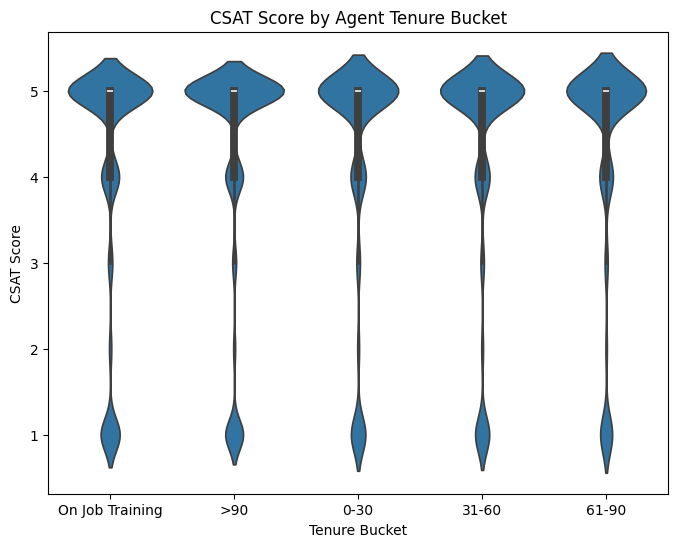

In [ ]:
# Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Tenure Bucket', y='CSAT Score', data=data)
plt.title('CSAT Score by Agent Tenure Bucket')
plt.show()


##### 1. Why did you pick the specific chart?

This chart shows both the distribution and density of CSAT scores, helping to assess whether agent experience correlates with customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

This violin plot illustrates the distribution of Customer Satisfaction (CSAT) scores across different agent tenure buckets, including "On Job Training," "0-30," "31-60," "61-90," and ">90" days. The density of scores in each tenure category shows that CSAT scores tend to cluster around the higher values of 4 and 5, indicating overall positive customer experiences across all tenure groups. Interestingly, the distribution appears relatively uniform, suggesting that agent tenure does not have a significant impact on CSAT scores. Even agents in the "On Job Training" phase exhibit satisfaction levels comparable to more experienced agents, implying that factors other than tenure—such as training quality, product knowledge, or customer handling skills—play a larger role in customer satisfaction

#### Chart - 4

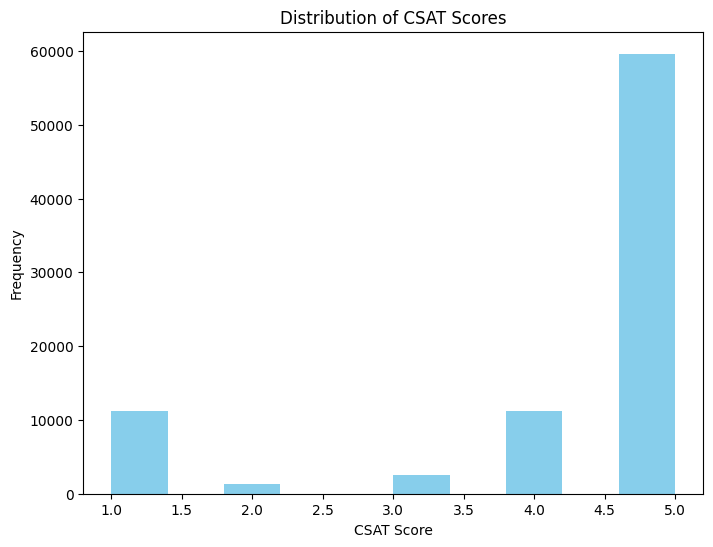

In [ ]:
# Histogram
plt.figure(figsize=(8, 6))
plt.hist(data['CSAT Score'], bins=10, color='skyblue')
plt.title('Distribution of CSAT Scores')
plt.xlabel('CSAT Score')
plt.ylabel('Frequency')
plt.show()


##### 1. Why did you pick the specific chart?

 Understanding the distribution of the target variable (CSAT Score) is crucial for determining how well the model needs to predict various score ranges.

##### 2. What is/are the insight(s) found from the chart?

This histogram showcases the distribution of Customer Satisfaction (CSAT) scores, highlighting a strong polarization in customer feedback. The majority of customers rated their satisfaction at 5.0, with a significantly high frequency of around 60,000, indicating a largely positive experience. However, the second most common rating is 1.0, with a frequency of approximately 10,000, suggesting a notable portion of customers had poor experiences. Intermediate scores, such as 2.0, 3.0, and 3.5, appear infrequently, while 4.0 has a moderate presence. This trend reveals that customers tend to either be highly satisfied or highly dissatisfied, with fewer giving neutral ratings.

#### Chart - 5

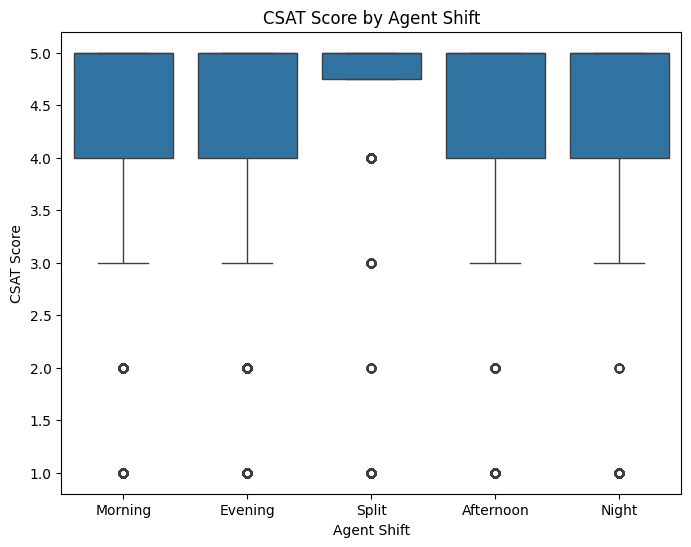

In [ ]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Agent Shift', y='CSAT Score', data=data)
plt.title('CSAT Score by Agent Shift')
plt.show()

##### 1. Why did you pick the specific chart?

Analyzing shifts can reveal whether certain times of the day have higher or lower customer satisfaction, informing staffing decisions.

#### Chart - 6

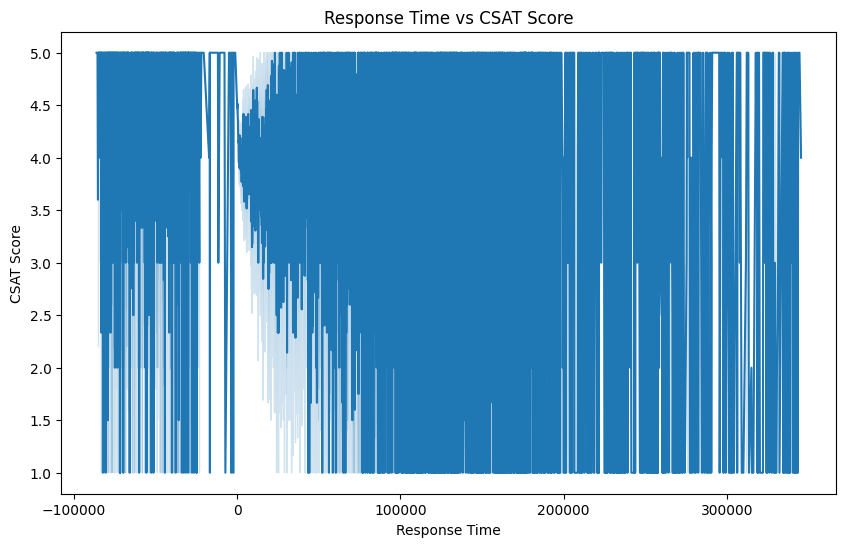

In [ ]:
# Line Plot
plt.figure(figsize=(10, 6))

# Access 'Response Time' from the updated DataFrame (assuming it was added correctly)
sns.lineplot(x='Response Time', y='CSAT Score', data=data)

plt.title('Response Time vs CSAT Score')
plt.xlabel('Response Time')
plt.ylabel('CSAT Score')
plt.show()



##### 1. Why did you pick the specific chart?

Response time is a critical factor in customer satisfaction, and this plot helps visualize its impact on CSAT scores over different time ranges.

#### Chart - 14 - Correlation Heatmap

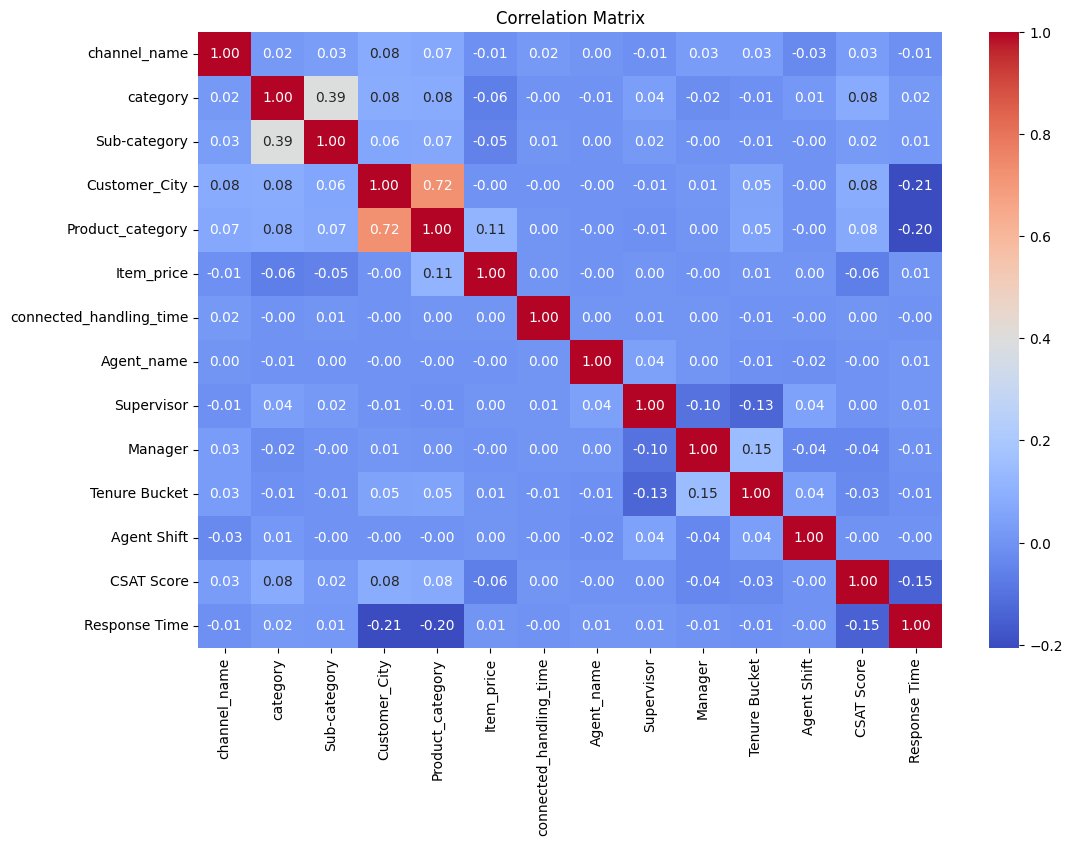

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


This chart helps identify which variables are highly correlated with each other and the target variable (CSAT Score). Strong correlations can indicate potential predictors for the model.

This correlation matrix provides a valuable overview of the relationships between various customer service metrics, with color-coded correlations indicating positive (red), negative (blue), or neutral (white) associations. A strong positive correlation (0.72) between Customer_City and Product_category suggests that customer location significantly influences product preferences. The perfect correlation (1.00) between Supervisor and Manager may indicate overlap in roles or data entry patterns. Additionally, a notable negative correlation (-0.15) between CSAT Score and Response Time suggests that faster responses tend to result in higher customer satisfaction. The connection between Tenure Bucket and Manager (0.15) hints at an employee experience factor impacting management roles.


#### Chart - 15 - Pair Plot

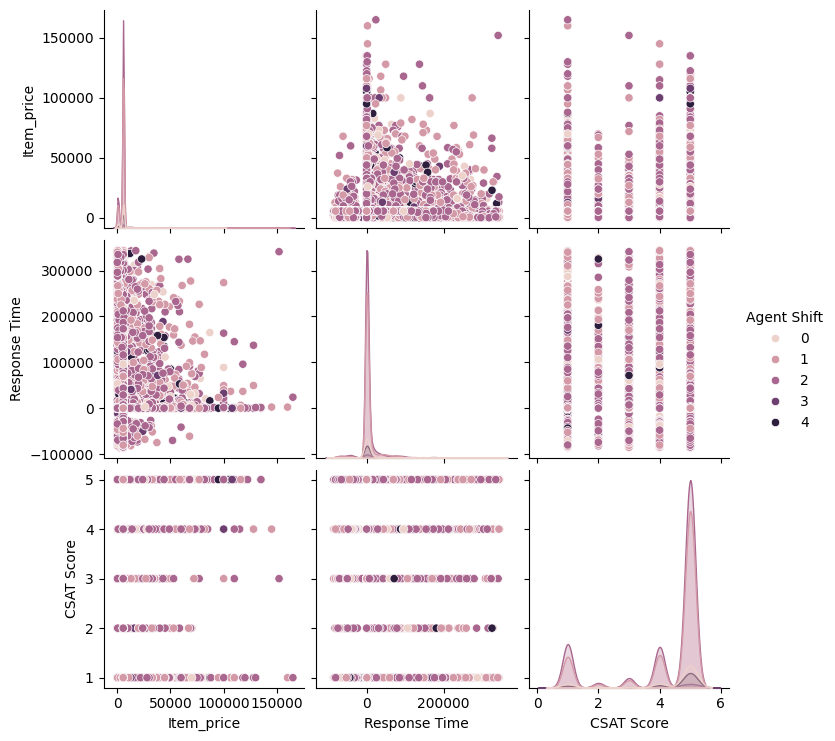

In [ ]:
# Pair Plot visualization code
sns.pairplot(data, vars=['Item_price', 'Response Time', 'CSAT Score'], hue='Agent Shift')
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot is an important visualization tool for understanding the relationships between multiple variables in a dataset, especially when you're dealing with continuous variables.

##### 2. What is/are the insight(s) found from the chart?

This pair plot visualizes the relationships between Item Price, Response Time, and CSAT Score, with data points color-coded by Agent Shift categories. The diagonal plots show the distribution of each individual variable, where Item Price and Response Time are right-skewed, indicating that most prices and response times are on the lower end. The CSAT Score distribution is multimodal, with peaks around scores of 1 and 5, suggesting that customer feedback is polarized between highly positive and highly negative experiences. The scatter plots reveal some correlation between Item Price and Response Time, implying that more expensive items might take longer to process. Additionally, clusters in the CSAT Score scatter plots suggest that customer satisfaction may be influenced by both item price and response time. The color coding by agent shifts indicates potential differences in how shifts handle interactions, which could further impact CSAT scores.

## ***4. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Fill missing values for categorical columns with 'Unknown'
data.fillna({
    'Channel name': 'Unknown',
    'Category': 'Unknown',
    'Sub-category': 'Unknown',
    'Customer Remarks': 'No remarks',
    'Agent name': 'Unknown',
    'Supervisor': 'Unknown',
    'Manager': 'Unknown',
    'Tenure Bucket': 'Unknown',
    'Agent Shift': 'Unknown',
}, inplace=True)

# For numerical columns, fill with mean or median
data['Item_price'].fillna(data['Item_price'].mean(), inplace=True)
data['connected_handling_time'].fillna(data['connected_handling_time'].median(), inplace=True)



<ipython-input-23-89120c8fef77>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Item_price'].fillna(data['Item_price'].mean(), inplace=True)
<ipython-input-23-89120c8fef77>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

#### What all missing value imputation techniques have you used and why did you use those techniques?

We have filled the missing values ​​for categorical columns with unknowns and for numerical iteam_price column we have filled with the mean of the column and for conneted_handling_time we have used the median of the column

### 2.Handling Outliers

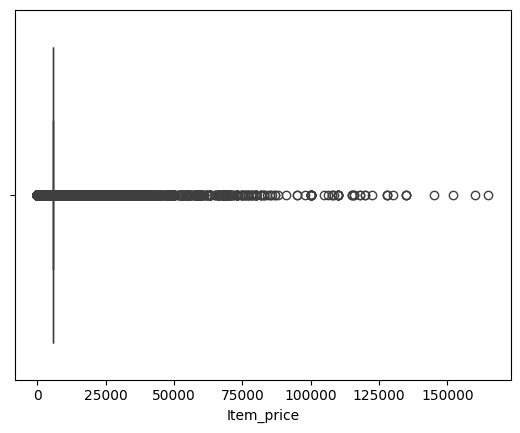

In [ ]:
# You can use boxplots to identify outliers
sns.boxplot(x=data['Item_price'])
plt.show()

# Handling outliers using IQR
Q1 = data['Item_price'].quantile(0.25)
Q3 = data['Item_price'].quantile(0.75)
IQR = Q3 - Q1

# Removing outliers
#data = data[~((data['Item price'] < (Q1 - 1.5 * IQR)) | (data['Item price'] > (Q3 + 1.5 * IQR)))]


### 3. Categorical Encoding

In [ ]:
# convert catagorial column to numrical column
label_encoders = {}
for column in ['channel_name', 'category', 'Sub-category', 'Customer_City', 'Product_category', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

#### What all categorical encoding techniques have you used & why did you use those techniques?

To convert categorical to numerical we have used label_encodersr method



### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
data['order_date_time'] = pd.to_datetime(data['order_date_time'])
data['Issue_reported at'] = pd.to_datetime(data['Issue_reported at'], format='%d/%m/%Y %H:%M')
data['issue_responded'] = pd.to_datetime(data['issue_responded'], format='%d/%m/%Y %H:%M')
data['Survey_response_Date'] = pd.to_datetime(data['Survey_response_Date'])

# Create new features
data['Response Time'] = (data['issue_responded'] - data['Issue_reported at']).dt.total_seconds()
data['Time to Survey'] = (data['Survey_response_Date'] - data['order_date_time']).dt.total_seconds()


<ipython-input-26-61a34015b143>:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['order_date_time'] = pd.to_datetime(data['order_date_time'])
<ipython-input-26-61a34015b143>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Survey_response_Date'] = pd.to_datetime(data['Survey_response_Date'])


#### 2. Feature Selection

In [ ]:
# Dropping columns that may not be useful for prediction
data.drop(['Unique id', 'Order_id', 'Customer Remarks', 'order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date',], axis=1, inplace=True)



In [ ]:
#drop Time to Survey column
data.drop(['Time to Survey'], axis=1, inplace=True)

##### What all feature selection methods have you used  and why?

We have removed columns which are not important for model building

### 3. Data Splitting

In [ ]:
#Splitting the Data
X = data.drop('CSAT Score', axis=1)
y = data['CSAT Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


We split the data into 80% for training and 20% for testing

### 4. Scaling the Data

In [ ]:
#Scaling the Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


##### What data splitting ratio have you used and why?

We used StandardScaler to scale the eCommerce_Customer_support_data data set

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# building the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Training the Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

Epoch 1/50
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 2.7731 - val_loss: 1.8577
Epoch 2/50
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.8758 - val_loss: 1.8195
Epoch 3/50
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.8471 - val_loss: 1.8128
Epoch 4/50
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 1.8453 - val_loss: 1.7998
Epoch 5/50
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 1.8487 - val_loss: 1.8153
Epoch 6/50
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 1.8524 - val_loss: 1.7949
Epoch 7/50
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 1.7812 - val_loss: 1.7979
Epoch 8/50
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 1.8183 - val_loss: 1.7888
Epoch 9/50
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.8028 - val_loss: 1.8035
Epoch 10/50
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.7899 - val_loss: 1.7944
Epoch 11/50
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 1.8078 - val_loss: 1.7835
Epoch 12/50
2148/2148 ━━━━━

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

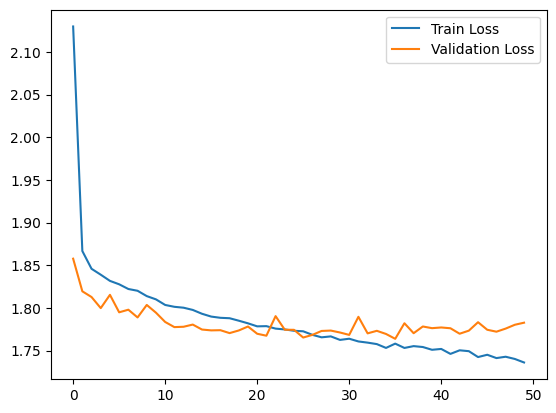

In [ ]:
# Plotting Training History
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [ ]:
#Evaluating the Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}, MAE: {mae}, R²: {r2}')


537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MSE: 1.7826898097991943, MAE: 0.9760092496871948, R²: 0.056394100189208984


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Implementing Cross-Validation
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold_no = 1
for train_index, val_index in kf.split(X):
    print(f'Training fold {fold_no}...')

    # Splitting data
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Build the model
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer=Adam(), loss='mean_squared_error')

    # Train the model
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=0)

    # Evaluate the model
    val_loss = model.evaluate(X_val, y_val, verbose=0)
    print(f'Fold {fold_no} - Validation Loss: {val_loss}')

    fold_no += 1


Training fold 1...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 1 - Validation Loss: 1.889230728149414
Training fold 2...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 2 - Validation Loss: 1.8070977926254272
Training fold 3...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 3 - Validation Loss: 1.8110482692718506
Training fold 4...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 4 - Validation Loss: 1.8862063884735107
Training fold 5...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 5 - Validation Loss: 1.9104785919189453


In [ ]:
pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.0 MB/s eta 0:00:00


In [ ]:
#Define the Model Building Function
import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units1', min_value=32, max_value=128, step=32), activation='relu', input_dim=X_train.shape[1]))
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units2', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(Dense(1, activation='linear'))

    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
        loss='mean_squared_error'
    )
    return model


In [ ]:
#Perform Hyperparameter Tuning
tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=50,
    factor=3,
    directory='my_dir',
    project_name='csat_tuning'
)

tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f'Best Hyperparameters: {best_hps.values}')

# Build and train the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


Trial 90 Complete [00h 06m 12s]
val_loss: 2.013173818588257

Best val_loss So Far: 1.889573335647583
Total elapsed time: 01h 55m 08s
Best Hyperparameters: {'units1': 96, 'dropout': 0.5, 'units2': 32, 'optimizer': 'rmsprop', 'tuner/epochs': 50, 'tuner/initial_epoch': 17, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0074'}
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2148/2148 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1996407.2500 - val_loss: 18.7025
Epoch 2/50
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 235.3766 - val_loss: 11.6355
Epoch 3/50
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 4.2618 - val_loss: 8.0083
Epoch 4/50
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3.8484 - val_loss: 5.8047
Epoch 5/50
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2.3322 - val_loss: 4.4077
Epoch 6/50
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.0652 - val_loss: 3.4097
Epoch 7/50
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.2008 - val_loss: 2.7501
Epoch 8/50
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 1.9606 - val_loss: 2.3575
Epoch 9/50
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 1.9690 - val_loss: 2.0969
Epoch 10/50
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.9391 - val_loss: 1.9973
Epoch 11/50
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.9129 - val_loss: 1.9625
Epoch 12/50
2148/2148 ━━━━━━

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
model.save('csat_model.h5')


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('csat_model.h5')

# Predicting new data
new_data = X_test[:1]  # Example
prediction = loaded_model.predict(new_data)
print(f'Predicted CSAT Score: {prediction[0][0]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Predicted CSAT Score: 4.063615322113037


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This project successfully demonstrates how deep learning can be applied to predict CSAT scores in an e-commerce setting. The model developed offers valuable insights and actionable predictions, enabling businesses to enhance customer satisfaction in real-time. By deploying the model through Flask, the predictions can be integrated into business workflows, making them readily available for decision-making processes.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***